In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

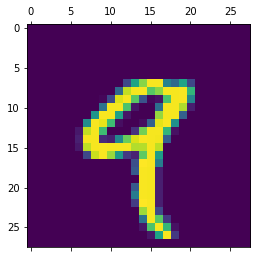

In [9]:
### To Look The Image

plt.matshow(X_train[4])

In [10]:
y_train[4]

9

In [15]:
### Scale The Data 
X_train = X_train/255
X_test = X_test/255

In [16]:
### Flatten The Data (Make The Data In single dimetional array) 
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

## Simple Nural Network

In [17]:
### Create The Simple Nural Network

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

### Compile The Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4661 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3039 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9260


In [19]:
### Test Data Prediction
model.fit(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2148 - accuracy: 0.9395


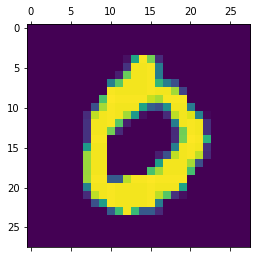

In [25]:
### Predict The Perticuler Value
plt.matshow(X_test[3])

In [26]:
y_pred = model.predict(X_test_flattened)
y_pred[3]

array([9.9860346e-01, 1.5057189e-09, 9.4445705e-02, 6.3873529e-03,
       2.5574240e-05, 3.2378495e-02, 2.1201092e-01, 1.0524750e-02,
       3.8097531e-02, 8.7218583e-02], dtype=float32)

In [27]:
### The The max score 
np.argmax(y_pred[3])

0

In [29]:
### Create the Y_pred lables in intiger
y_pred_lab = [np.argmax(i) for i in y_pred]
y_pred_lab[:5]

[7, 2, 1, 0, 4]

In [30]:
### Create The Confution matrics
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lab)

In [31]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    1,    3,    8,    3,    3,    1],
       [   0, 1119,    3,    2,    1,    1,    3,    2,    4,    0],
       [   3,    1,  945,   16,   13,    1,   10,   14,   26,    3],
       [   0,    0,   13,  959,    1,   10,    0,    9,   12,    6],
       [   0,    1,    3,    2,  939,    1,    6,    3,    6,   21],
       [   5,    4,    4,   54,   10,  754,   13,    4,   37,    7],
       [   4,    3,    2,    1,    5,    8,  931,    1,    3,    0],
       [   1,    6,   16,    5,    4,    0,    0,  967,    1,   28],
       [   3,    7,    5,   24,    6,   10,    8,    7,  896,    8],
       [   5,    6,    1,   12,   22,    3,    0,   20,    9,  931]])>

Text(69.0, 0.5, 'real')

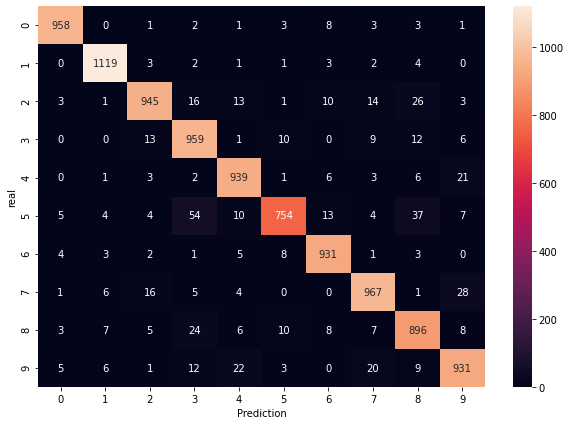

In [34]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('real')

## Add Hidden Layear

In [36]:
### Add Hidden Layear
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

### Compile The Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2782 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9837


In [37]:
### Test Data 
model.fit(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9758


Text(69.0, 0.5, 'real')

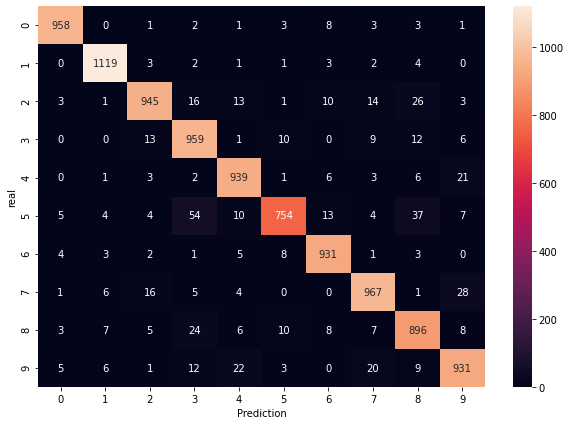

In [38]:
y_pred_lab = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lab)

### Heat map
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('real')

## Add Flatten Layear

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

### Compile The Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1219 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9836


In [40]:
model.fit(X_test_flattened,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0807 - accuracy: 0.9731
